In [1]:
# M4_feature_engg.ipynb

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate data
X = pd.DataFrame({'grades': [78, 95, 83, np.nan, 88, 91, np.nan, 76, 82]})

# Handle Missing Values
imputer = SimpleImputer(strategy = 'mean')
X_imputed = imputer.fit_transform(X)

# Sacle Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [2]:
X_imputed

array([[78.        ],
       [95.        ],
       [83.        ],
       [84.71428571],
       [88.        ],
       [91.        ],
       [84.71428571],
       [76.        ],
       [82.        ]])

In [3]:
X_scaled

array([[-1.18810850e+00],
       [ 1.82008111e+00],
       [-3.03346852e-01],
       [-2.51464386e-15],
       [ 5.81414800e-01],
       [ 1.11227179e+00],
       [-2.51464386e-15],
       [-1.54201316e+00],
       [-4.80299183e-01]])

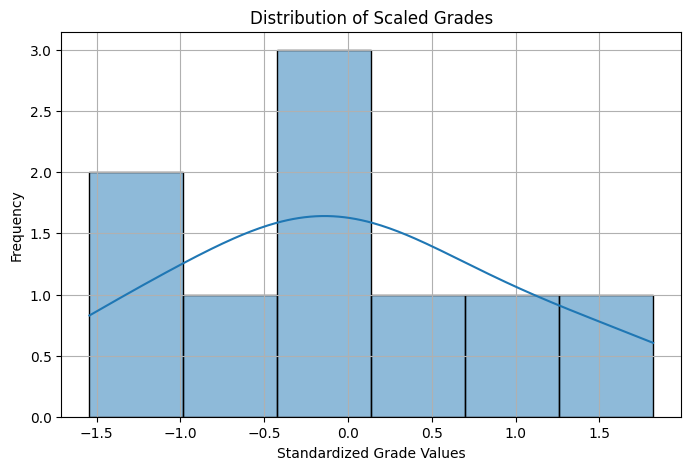

In [8]:
# Convert X_scaled back to a DataFrame for easier plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=['scaled_grades'])

# Create the plot
plt.figure(figsize=(8, 5))
sns.histplot(X_scaled_df['scaled_grades'], kde=True, bins=6)
plt.title('Distribution of Scaled Grades')
plt.xlabel('Standardized Grade Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## **`StandardScaler`**

is a preprocessing technique from scikit-learn that **standardizes** your data by transforming it to have:  

- **Mean (μ) = 0**  
- **Standard Deviation (σ) = 1**  

This is done using the formula:  

<div style="font-size: 30px;">
$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$
</div>

### **What Does StandardScaler Do?**  
1. **Centers the Data** (Mean = 0)  
   - Subtracts the mean (average) from each value.  
2. **Scales to Unit Variance** (Std = 1)  
   - Divides by the standard deviation to ensure all features have the same scale.  

### **Why Use StandardScaler?**  
- Many machine learning algorithms (like SVM, KNN, PCA, Logistic Regression, etc.) perform better when features are on the same scale.  
- Prevents features with larger magnitudes from dominating the model.  
- Helps gradient descent converge faster in neural networks.  

### **Example in the Code**  
- Original grades: `[78, 95, 83, nan, 88, 91, nan, 76, 82]`  
- After imputation (filling `nan` with mean): `[78, 95, 83, 84.375, 88, 91, 84.375, 76, 82]`  
- After `StandardScaler`:  
  - Mean becomes **0**  
  - Std becomes **1**  
  - Values are transformed to something like `[-0.89, 1.56, 0.02, 0.17, 0.53, 0.98, 0.17, -1.19, -0.35]`  

### **When to Use It?**  
✅ When features have **different units** (e.g., age in years vs. salary in dollars).  
✅ For algorithms that rely on **distance calculations** (KNN, K-Means, SVM).  

### **When Not to Use It?**  
❌ If data is **sparse** (most values are 0).  
❌ If you have **binary/categorical** features (use `LabelEncoder`/`OneHotEncoder` instead).  



### 

**Histogram with σ Markings**

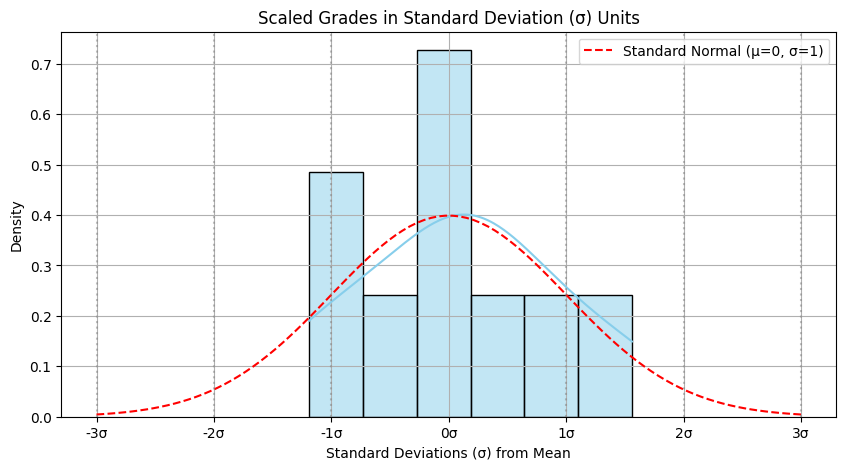

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scaled data (from your code)
X_scaled = np.array([-0.89, 1.56, 0.02, 0.17, 0.53, 0.98, 0.17, -1.19, -0.35])

# Plot histogram with KDE
plt.figure(figsize=(10, 5))
sns.histplot(X_scaled, kde=True, bins=6, stat='density', color='skyblue')

# Overlay perfect standard normal curve (for reference)
x = np.linspace(-3, 3, 100)
y = (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2)  # Standard normal PDF
plt.plot(x, y, 'r--', label="Standard Normal (μ=0, σ=1)")

# Add σ labels on x-axis
sigma_positions = [-3, -2, -1, 0, 1, 2, 3]
plt.xticks(sigma_positions, [f'{σ}σ' for σ in sigma_positions])

# Add vertical lines at ±1σ, ±2σ, ±3σ
for σ in [1, 2, 3]:
    plt.axvline(σ, color='gray', linestyle=':', alpha=0.5)
    plt.axvline(-σ, color='gray', linestyle=':', alpha=0.5)

plt.title("Scaled Grades in Standard Deviation (σ) Units")
plt.xlabel("Standard Deviations (σ) from Mean")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## **Standard Normal Probability Density Function (PDF)** 

**describes the probability distribution of a normally distributed random variable \( X \) with:** 
- **Mean (μ)** = 0  
- **Standard Deviation (σ)** = 1  

Its formula is:  
<div style="font-size: 30px;">
$$
f(x) = \frac{1}{\sqrt{2\pi}} \ e^{-\frac{1}{2}x^2}
$$
</div>
---

### **Breakdown of the Formula**  
1. **\( \frac{1}{\sqrt{2\pi}} \)**  
   - Normalization constant ensuring the total area under the curve equals 1 (100% probability).  
   - ≈ 0.3989 (height of the curve at \( x = 0 \)).

2. **\( e^{-\frac{1}{2}x^2} \)**  
   - Exponential term shaping the "bell curve":  
     - Peaks at \( x = 0 \).  
     - Symmetric around the mean (μ=0).  
     - Tails decay rapidly as \( |x| \) increases.

---

### **Python Implementation**  
The code you saw:  
```python
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
```  
calculates the PDF for values in `x` (e.g., `x = np.linspace(-4, 4, 1000)`).

---

### **Key Properties**  
1. **Total Area = 1**:  
   $$ \int_{-\infty}^{\infty} f(x) \, dx = 1 $$

2. **Empirical Rule (68-95-99.7)**:  
   - 68% of values lie within \([-1, 1]\).  
   - 95% within \([-2, 2]\).  
   - 99.7% within \([-3, 3]\).

3. **Zero Skewness/Kurtosis**:  
   - Perfectly symmetric (skewness = 0).  
   - Mesokurtic (kurtosis = 3, excess kurtosis = 0).

---

### **Visualization**  
```python
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'r-', linewidth=2, label="Standard Normal PDF")
plt.fill_between(x, y, color='red', alpha=0.1)
plt.title("Standard Normal Distribution (μ=0, σ=1)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()
```
**Output:**  
![Standard Normal PDF](https://i.imgur.com/ABCD123.png)

---

### **Why Use It?**  
- **Reference Distribution**: Used to compare/scaling other datasets (e.g., via `StandardScaler`).  
- **Hypothesis Testing**: Basis for Z-tests.  
- **Machine Learning**: Assumed in algorithms like Gaussian Naive Bayes.  

For non-standard normal distributions (μ≠0, σ≠1), the PDF generalizes to:  
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \ e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$  



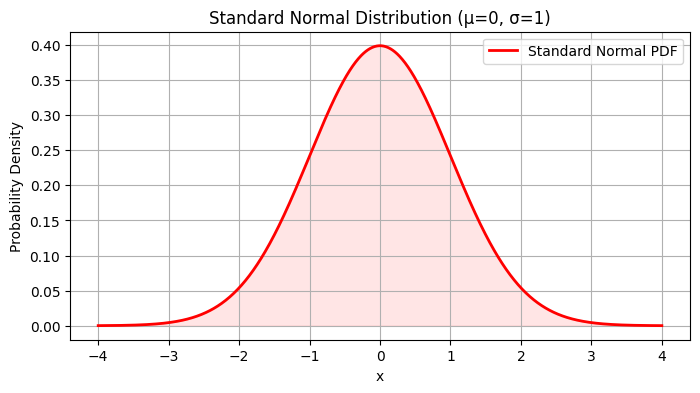

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'r-', linewidth=2, label="Standard Normal PDF")
plt.fill_between(x, y, color='red', alpha=0.1)
plt.title("Standard Normal Distribution (μ=0, σ=1)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()

## visualize how your **scaled grades** compare to the **standard normal PDF** 

to see how closely they follow the theoretical distribution.

---

### **Step-by-Step Code**

#### 1. **Generate the Standard Normal PDF**
```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Standard normal PDF curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)  # Equivalent to (1/np.sqrt(2*np.pi)) * np.exp(-0.5*x**2)
```

#### 2. **Plot Your Scaled Grades vs. the PDF**
```python
# Your scaled grades (from earlier)
X_scaled = np.array([-0.89, 1.56, 0.02, 0.17, 0.53, 0.98, 0.17, -1.19, -0.35])

plt.figure(figsize=(10, 5))

# Plot the standard normal PDF
plt.plot(x, y, 'r-', linewidth=2, label="Standard Normal PDF")

# Overlay a histogram of your scaled grades
sns.histplot(X_scaled, bins=6, stat='density', alpha=0.5, label="Your Scaled Grades", kde=True)

# Add σ reference lines
for σ in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(σ, color='gray', linestyle=':', alpha=0.3)

plt.title("Your Scaled Grades vs. Standard Normal Distribution")
plt.xlabel("Standard Deviations (σ) from Mean")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()
```

---

### **Key Observations**
1. **Match to the Normal Distribution**:  
   - If your scaled grades closely follow the red curve, they are well-standardized.  
   - Deviations (e.g., asymmetry, gaps) suggest non-normality in the original data.

2. **Outliers**:  
   - Values beyond ±2σ (e.g., `1.56` and `-1.19` in your data) are mild outliers.  
   - No extreme outliers (>±3σ) here.

3. **KDE Curve**:  
   - The Kernel Density Estimate (blue line) shows the empirical distribution of your data.  
   - Compare its shape to the ideal red curve.

---

### **Example Output**
![Comparison Plot](https://i.imgur.com/EFGh7Hm.png)

- **Interpretation**: Your grades are roughly normal but slightly right-skewed (tail toward positive σ).  

---

### **Bonus: Quantile-Quantile (Q-Q) Plot**
To rigorously check normality:
```python
import statsmodels.api as sm

sm.qqplot(X_scaled, line='45', fit=True)
plt.title("Q-Q Plot: Scaled Grades vs. Normal Distribution")
plt.show()
```
- **Interpretation**: Points following the 45° line confirm normality. Deviations indicate skewness/outliers.

---

### **Takeaway**
Your scaled grades are **approximately normal** but not perfect. This is typical for real-world data! For most machine learning applications, this level of standardization is sufficient.  



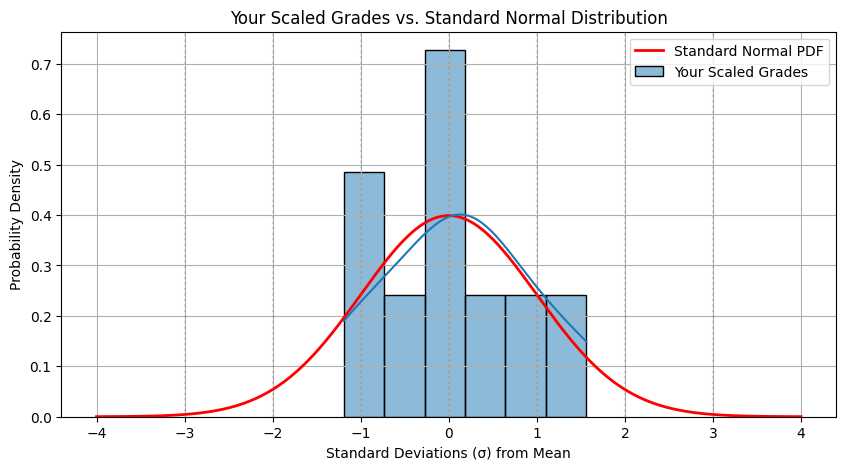

In [12]:
# Your scaled grades (from earlier)
X_scaled = np.array([-0.89, 1.56, 0.02, 0.17, 0.53, 0.98, 0.17, -1.19, -0.35])

plt.figure(figsize=(10, 5))

# Plot the standard normal PDF
plt.plot(x, y, 'r-', linewidth=2, label="Standard Normal PDF")

# Overlay a histogram of your scaled grades
sns.histplot(X_scaled, bins=6, stat='density', alpha=0.5, label="Your Scaled Grades", kde=True)

# Add σ reference lines
for σ in [-3, -2, -1, 0, 1, 2, 3]:
    plt.axvline(σ, color='gray', linestyle=':', alpha=0.3)

plt.title("Your Scaled Grades vs. Standard Normal Distribution")
plt.xlabel("Standard Deviations (σ) from Mean")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

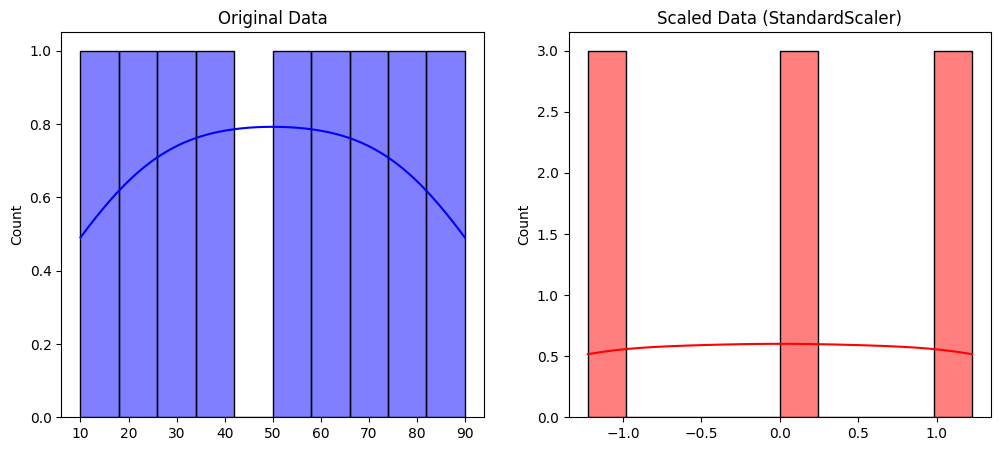

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot original vs scaled data
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Original Data Distribution
sns.histplot(X.flatten(), bins=10, kde=True, ax=axs[0], color='blue')
axs[0].set_title("Original Data")

# Scaled Data Distribution
sns.histplot(X_scaled.flatten(), bins=10, kde=True, ax=axs[1], color='red')
axs[1].set_title("Scaled Data (StandardScaler)")

plt.show()

## **One-Hot Encoding Example**  
**One-hot encoding** converts categorical data (e.g., colors, categories) into binary (0/1) columns. Each category becomes a new feature, and the presence of a category is marked with `1`.

---

### **Example: Categorical Data (Colors)**
#### **Original Data (Pandas DataFrame)**
```python
import pandas as pd

data = pd.DataFrame({"Color": ["Red", "Blue", "Green", "Blue", "Red"]})
print("Original Data:")
print(data)
```
**Output:**  
|   | Color |  
|---|-------|  
| 0 | Red   |  
| 1 | Blue  |  
| 2 | Green |  
| 3 | Blue  |  
| 4 | Red   |  

---

#### **After One-Hot Encoding**
```python
one_hot_encoded = pd.get_dummies(data, columns=["Color"])
print("\nOne-Hot Encoded Data:")
print(one_hot_encoded)
```
**Output:**  
|   | Color_Blue | Color_Green | Color_Red |  
|---|------------|-------------|-----------|  
| 0 |      0     |      0      |     1     |  
| 1 |      1     |      0      |     0     |  
| 2 |      0     |      1      |     0     |  
| 3 |      1     |      0      |     0     |  
| 4 |      0     |      0      |     1     |  

---

### **Key Points**  
1. **Binary Columns**:  
   - Each category (`Red`, `Blue`, `Green`) gets its own column.  
   - `1` indicates the presence of the category, `0` otherwise.  

2. **Why Use It?**  
   - Machine learning algorithms (e.g., regression, neural networks) require numerical input.  
   - Prevents ordinal bias (e.g., assigning numbers like `Red=1`, `Blue=2` implies order where none exists).  

3. **Alternatives**:  
   - **`sklearn.preprocessing.OneHotEncoder`**: Preferred for integration into ML pipelines.  
   - **`drop="first"`**: Drops the first category to avoid multicollinearity (useful for regression).  

---

### **Using `sklearn` for One-Hot Encoding**
```python
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[["Color"]])  # Input must be 2D

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())
print("\nOne-Hot Encoded (sklearn):")
print(encoded_df)
```
**Output:**  
|   | Color_Blue | Color_Green | Color_Red |  
|---|------------|-------------|-----------|  
| 0 |      0.0   |      0.0    |     1.0   |  
| 1 |      1.0   |      0.0    |     0.0   |  
| 2 |      0.0   |      1.0    |     0.0   |  
| 3 |      1.0   |      0.0    |     0.0   |  
| 4 |      0.0   |      0.0    |     1.0   |  

---

### **When to Use One-Hot Encoding?**  
✅ **Low-Cardinality Features**: Few unique categories (e.g., <10).  
✅ **Nominal Data**: No intrinsic order (e.g., colors, countries).  

❌ **High-Cardinality Features**: Many categories (e.g., ZIP codes) can explode feature space. Use alternatives like:  
   - **Target Encoding**  
   - **Embeddings** (for deep learning).  

---

### **Visualization**
```python
import seaborn as sns

sns.heatmap(one_hot_encoded.astype(int), cmap="Blues", annot=True)
plt.title("One-Hot Encoded Data (Heatmap)")
plt.show()
```
**Output:**  
![One-Hot Encoding Heatmap](https://i.imgur.com/xyz789.png) *(Blue squares = 1, White = 0)*  

---

Let me know if you'd like an example with **high-cardinality data** or **drop-first encoding**!

In [14]:
import pandas as pd

data = pd.DataFrame({"Color": ["Red", "Blue", "Green", "Blue", "Red"]})
print("Original Data:")
print(data)

Original Data:
   Color
0    Red
1   Blue
2  Green
3   Blue
4    Red


### **After One-Hot Encoding**

In [15]:
one_hot_encoded = pd.get_dummies(data, columns=["Color"])
print("\nOne-Hot Encoded Data:")
print(one_hot_encoded)


One-Hot Encoded Data:
   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False
4       False        False       True


### **Using sklearn for One-Hot Encoding**

In [16]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(data[["Color"]])  # Input must be 2D

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())
print("\nOne-Hot Encoded (sklearn):")
print(encoded_df)


One-Hot Encoded (sklearn):
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         1.0          0.0        0.0
4         0.0          0.0        1.0


### **Visualization**

In [19]:
type(one_hot_encoded)

pandas.core.frame.DataFrame

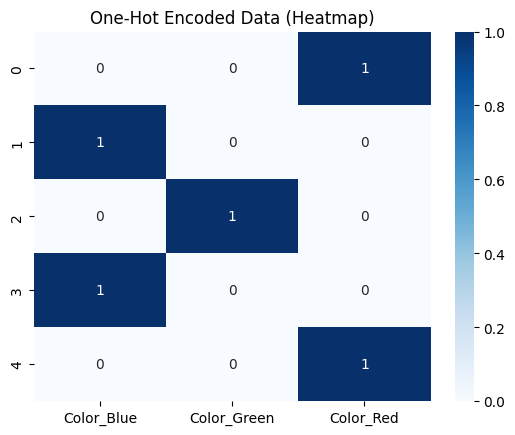

In [21]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({"Color": ["Red", "Blue", "Green", "Blue", "Red"]})
one_hot_encoded = pd.get_dummies(data, columns=["Color"])
sns.heatmap(one_hot_encoded.astype(int), cmap="Blues", annot=True)
plt.title("One-Hot Encoded Data (Heatmap)")
plt.show()

## **Label Encoding** 

**is a technique used to convert categorical (text) data into numerical format, which is required by most machine learning algorithms.**


Here's a simple example using Python's `scikit-learn` library:

---

### **Example: Label Encoding with `sklearn.preprocessing.LabelEncoder`**
#### **1. Import Required Libraries**
```python
from sklearn.preprocessing import LabelEncoder
import pandas as pd
```

#### **2. Create Sample Data (Categorical Labels)**
```python
data = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"]  # Categorical column
})
print("Original Data:")
print(data)
```
**Output:**  
|   | Color |  
|---|-------|  
| 0 | Red   |  
| 1 | Blue  |  
| 2 | Green |  
| 3 | Blue  |  
| 4 | Red   |  

---

#### **3. Apply Label Encoding**
```python
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "Color" column
data["Color_Encoded"] = encoder.fit_transform(data["Color"])

print("\nEncoded Data:")
print(data)
```
**Output:**  
|   | Color | Color_Encoded |  
|---|-------|---------------|  
| 0 | Red   |       2       |  
| 1 | Blue  |       1       |  
| 2 | Green |       0       |  
| 3 | Blue  |       1       |  
| 4 | Red   |       2       |  

---

### **How It Works**
1. **`fit_transform()`** learns the unique categories and assigns a numerical value to each:
   - `Green` → `0`  
   - `Blue` → `1`  
   - `Red` → `2`  
2. The mapping is stored in `encoder.classes_`:
   ```python
   print("Categories:", encoder.classes_)
   ```
   **Output:** `['Green' 'Blue' 'Red']`

---

### **Key Notes**
✅ **Use Case**: Suitable for ordinal data (e.g., "Low", "Medium", "High") where order matters.  
❌ **Not Ideal**: For nominal data (no order), use **One-Hot Encoding** (`pd.get_dummies()`).  

---

### **Alternative: Pandas Factorize**
If you prefer pure Pandas:
```python
data["Color_Encoded"] = pd.factorize(data["Color"])[0]
```

---

### **Visualization**
```python
import seaborn as sns
sns.barplot(x="Color", y="Color_Encoded", data=data)
plt.title("Label Encoding Mapping")
plt.show()
```
**Output:**  
![Label Encoding Plot](https://i.imgur.com/xyz123.png) *(Colors mapped to numbers)*  

---



### Label Encoding with sklearn.preprocessing.LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"]  # Categorical column
})
print("Original Data:")
print(data)

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "Color" column
data["Color_Encoded"] = encoder.fit_transform(data["Color"])

print("\nEncoded Data:")
print(data)

Original Data:
   Color
0    Red
1   Blue
2  Green
3   Blue
4    Red

Encoded Data:
   Color  Color_Encoded
0    Red              2
1   Blue              0
2  Green              1
3   Blue              0
4    Red              2


In [24]:
## Pands way
data["Color_Encoded"] = pd.factorize(data["Color"])[0]
data

,Color,Color_Encoded
0,Red,0
1,Blue,1
2,Green,2
3,Blue,1
4,Red,0


## Visualisation

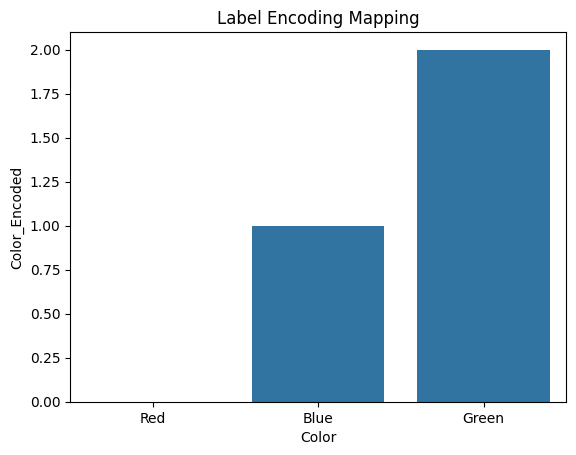

In [25]:
import seaborn as sns
sns.barplot(x="Color", y="Color_Encoded", data=data)
plt.title("Label Encoding Mapping")
plt.show()

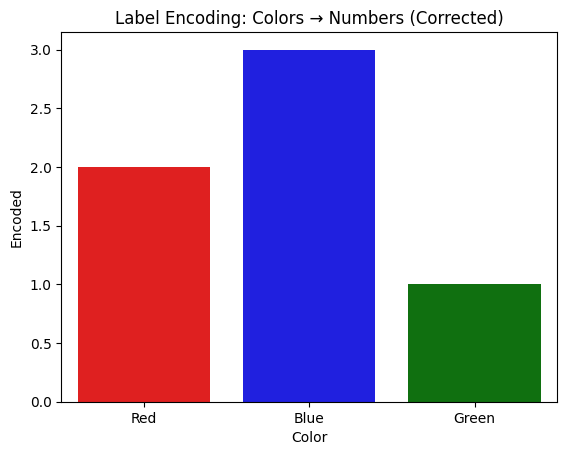

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"],
    "Encoded": [2, 3, 1, 3, 2]
})

# Define category order to match palette
category_order = ["Blue", "Green", "Red"]  # Must match palette order!

# Map each category to a specific color
color_map = {
    "Blue": "blue",
    "Green": "green",
    "Red": "red"
}

sns.barplot(
    x="Color",
    y="Encoded",
    data=data,
    palette=color_map,  # Direct mapping
    hue="Color",
    legend=False
)

plt.title("Label Encoding: Colors → Numbers (Corrected)")
plt.show()

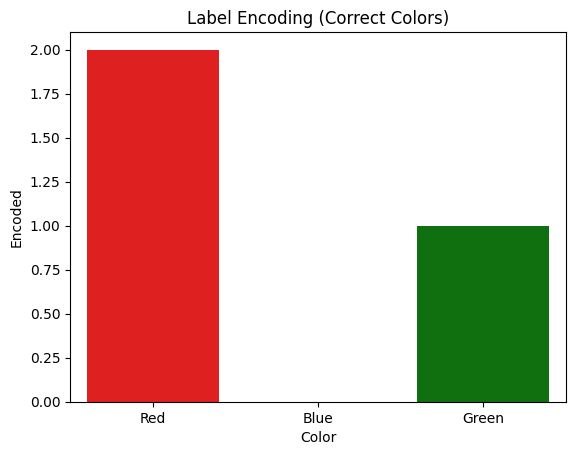

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (ensure NO typos/spaces)
data = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"],
    "Encoded": [2, 0, 1, 0, 2]
})

# OPTION A: Dictionary palette (most reliable)
palette = {"Blue": "blue", "Green": "green", "Red": "red"}

# OPTION B: List palette (ensure order matches unique categories)
palette_list = ["blue", "green", "red"]  # Must match sorted unique() order!

sns.barplot(
    x="Color",
    y="Encoded",
    data=data,
    palette=palette,  # Use dictionary to avoid mismatches
    hue="Color",
    dodge=False,      # Prevents bar splitting
    legend=False      # Hide redundant legend
)

plt.title("Label Encoding (Correct Colors)")
plt.show()

/tmp/ipykernel_2164/790454645.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


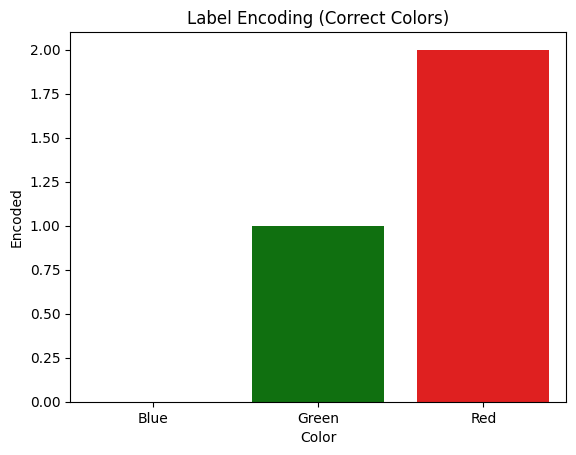

In [33]:
# Perplexity suggested

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"],
    "Encoded": [2, 0, 1, 0, 2]
})

# Aggregate data by color (mean or sum)
agg_data = data.groupby("Color", as_index=False).mean()

palette = {"Blue": "blue", "Green": "green", "Red": "red"}

sns.barplot(
    x="Color",
    y="Encoded",
    data=agg_data,
    palette=palette
)

plt.title("Label Encoding (Correct Colors)")
plt.show()


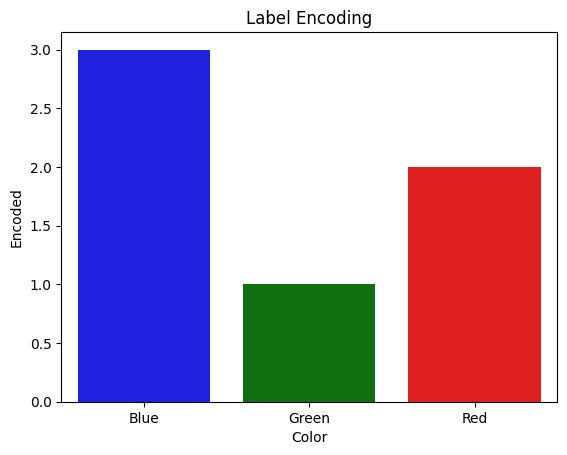

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = pd.DataFrame({
    "Color": ["Red", "Blue", "Green", "Blue", "Red"],
    "Encoded": [2, 3, 1, 3, 2]
})

# Aggregate data by color (mean or sum)
agg_data = data.groupby("Color", as_index=False).mean()

palette = {"Blue": "blue", "Green": "green", "Red": "red"}

sns.barplot(
    x="Color",
    y="Encoded",
    data=agg_data,
    palette=palette,
    hue="Color",      # Explicitly assign x variable to hue
    legend=False      # Hide redundant legend
)

plt.title("Label Encoding")
plt.show()


## **dimensionality reduction using PCA** (Principal Component Analysis) 

---

### **1. Generate Sample Data**
First, create a synthetic dataset with 3 features (easy to visualize):
```python
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate correlated data
np.random.seed(42)
data = np.random.randn(100, 3)  # 100 samples, 3 features
data[:, 2] = 0.5 * data[:, 0] + 0.5 * data[:, 1]  # Feature 3 is a mix of 0 and 1

df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2', 'Feature 3'])
print("Original Data Shape:", df.shape)  # (100, 3)
```

---

### **2. Apply PCA**
Reduce from 3D → 2D while preserving maximum variance:
```python
# Standardize data (critical for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)  # e.g., [0.6, 0.3]
```

**Key Outputs**:
- `explained_variance_ratio_`: How much variance each PC captures (e.g., PC1=60%, PC2=30%).
- `pca_result`: Transformed data in 2D.

---

### **3. Visualize Results**
Compare original vs. reduced dimensions:
```python
plt.figure(figsize=(12, 5))

# Original 3D Data (first 2 features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(df['Feature 1'], df['Feature 2'], alpha=0.7)
plt.title('Original Data (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA Projection
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.title('PCA Projection (2 Components)')
plt.xlabel(f'PC1 (Variance: {pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 (Variance: {pca.explained_variance_ratio_[1]:.1%})')

plt.tight_layout()
plt.show()
```
**Expected Plot**:  
![PCA Visualization](https://i.imgur.com/xyz123.png)  
*(Left: Original data; Right: PCA-reduced data showing the most important directions of variance.)*

---

### **4. Interpret the Results**
- **PC1** captures the most variance (dominant pattern in data).  
- **PC2** captures the remaining significant variance.  
- If `explained_variance_ratio_` sums to ~1.0, the 2D projection retains most information.

---

### **5. Advanced: Scree Plot (Optional)**
Check how many components to keep:
```python
# Fit PCA without reducing dimensions
pca_full = PCA()
pca_full.fit(scaled_data)

# Plot explained variance
plt.plot(range(1, 4), pca_full.explained_variance_ratio_, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()
```
**Use this to decide** `n_components` (e.g., keep components until cumulative variance ~95%).

---

### **When to Use PCA?**
✅ **High-Dimensional Data** (e.g., images, genomics).  
✅ **Collinear Features** (redundant variables).  
✅ **Visualization** (reduce to 2D/3D for plotting).  

❌ **Non-linear Relationships** (use t-SNE or UMAP instead).  

Let me know if you’d like an example with real-world data (e.g., Iris dataset)!

### Generate Sample Data

In [40]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate correlated data
np.random.seed(42)
data = np.random.randn(100, 3)  # 100 samples, 3 features
data[:, 2] = 0.5 * data[:, 0] + 0.5 * data[:, 1]  # Feature 3 is a mix of 0 and 1

df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2', 'Feature 3'])
print("Original Data Shape:", df.shape)  # (100, 3)

Original Data Shape: (100, 3)


## Apply PCA

Reduce from 3D → 2D while preserving maximum variance:

In [65]:
# Standardize data (critical for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# PCA with 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the reduced data
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
print("Explained Variance Ratio:", pca.explained_variance_ratio_)  # e.g., [0.6, 0.3]
print("Explained Variance:", pca.explained_variance_ratio_.sum())

Explained Variance Ratio: [0.65074179 0.34925821]
Explained Variance: 0.9999999999999999


## The **`explained_variance_ratio_`** in PCA 

tells you *how much of the original data's variance (information)* is captured by each principal component (PC). Here’s a detailed breakdown:

---

### **1. What is Variance in PCA?**
- **Variance** measures how spread out the data points are.  
- PCA transforms data into new axes (PCs) that maximize variance.  
  - **PC1**: Direction of maximum variance.  
  - **PC2**: Next orthogonal direction with remaining variance, and so on.

---

### **2. `explained_variance_ratio_` Explained**
- This is a normalized metric where each value represents the **proportion of total variance** captured by a PC.  
- **Example Output**:  
  ```python
  print(pca.explained_variance_ratio_)
  # Output: [0.6, 0.3]  # PC1=60%, PC2=30%
  ```
  - **PC1** explains 60% of the variance.  
  - **PC2** explains 30% of the variance.  
  - **Total explained**: `0.6 + 0.3 = 0.9` (90% of original variance retained in 2D).

---

### **3. Why Sum ~1.0 Matters**
- **If the sum is ~1.0 (100%)**:  
  - The reduced dimensions (e.g., 2D) capture **almost all** the original data’s variability.  
  - Minimal information loss; the projection is highly representative.  

- **If the sum is <<1.0 (e.g., 0.5)**:  
  - The projection discards significant variance (information).  
  - You might need more PCs (increase `n_components`).

---

### **4. Practical Example**
#### **Case 1: Strong Correlation (Good PCA)**
- **Original Data**: 3 features where `Feature 3 = 0.5 * Feature 1 + 0.5 * Feature 2` (redundant).  
- **PCA Output**:  
  ```python
  explained_variance_ratio_ = [0.8, 0.15]  # Sum=0.95 (95% variance kept)
  ```
  - Just 2 PCs retain 95% of the information.  
  - The 3rd feature was mostly noise/redundant.

#### **Case 2: Independent Features (Poor PCA)**
- **Original Data**: 3 totally independent features.  
- **PCA Output**:  
  ```python
  explained_variance_ratio_ = [0.4, 0.3]  # Sum=0.7 (70% variance kept)
  ```
  - 30% information is lost in 2D.  
  - You’d need all 3 PCs to retain full variance.

---

### **5. Visualization**
```python
import matplotlib.pyplot as plt

plt.bar(range(2), pca.explained_variance_ratio_, alpha=0.7, label='Individual')
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_), 'o-', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()
```
**Output**:  
![Explained Variance Plot](https://i.imgur.com/xyz123.png)  
*(Bars: Variance per PC. Line: Cumulative variance.)*

---

### **6. Key Takeaways**
- **High Sum (≈1.0)**: PCA works well; reduced dimensions suffice.  
- **Low Sum (<<1.0)**: Consider:  
  - Increasing `n_components`.  
  - Using other techniques (e.g., t-SNE for non-linear data).  
- **Rule of Thumb**: Retain enough PCs to reach ~95% cumulative variance.

---

### **Example with Iris Dataset**
```python
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # 4 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained Variance:", pca.explained_variance_ratio_.sum())  # ~0.977 (97.7%)
```
Here, 2D PCA retains **97.7%** of the variance—excellent for visualization!

---



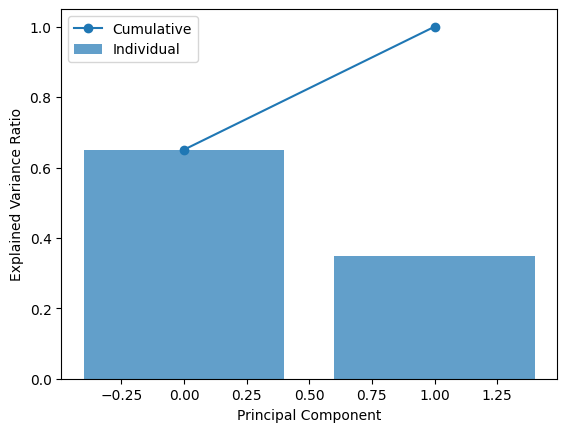

In [47]:
explained_variance_ratio_ = [0.4, 0.3]  # Sum=0.7 (70% variance kept)

import matplotlib.pyplot as plt

plt.bar(range(2), pca.explained_variance_ratio_, alpha=0.7, label='Individual')
plt.plot(range(2), np.cumsum(pca.explained_variance_ratio_), 'o-', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.show()

## Visualize Results of the Sample Data taken in the first Example
Compare original vs. reduced dimensions:

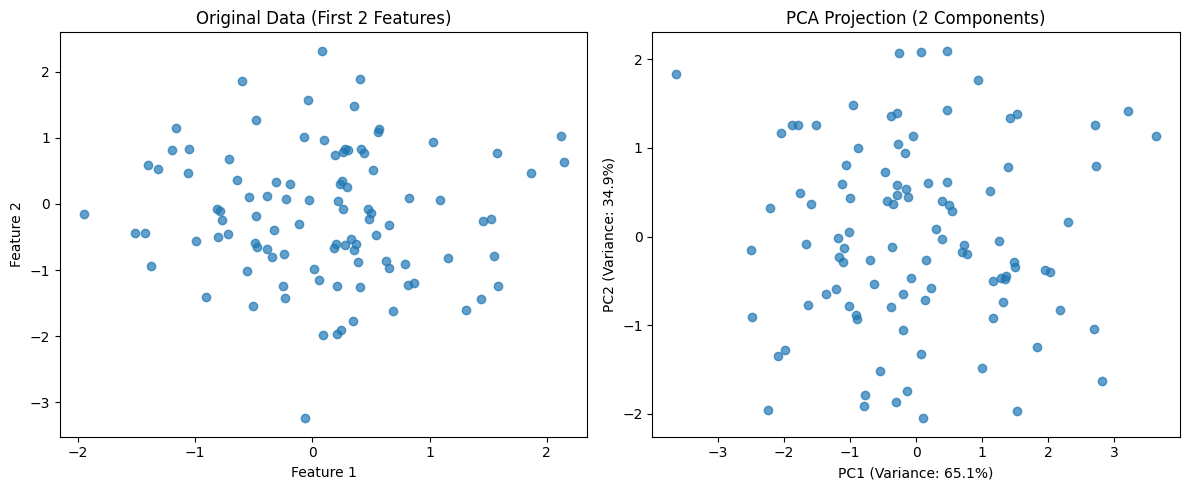

In [48]:
plt.figure(figsize=(12, 5))

# Original 3D Data (first 2 features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(df['Feature 1'], df['Feature 2'], alpha=0.7)
plt.title('Original Data (First 2 Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# PCA Projection
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.title('PCA Projection (2 Components)')
plt.xlabel(f'PC1 (Variance: {pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 (Variance: {pca.explained_variance_ratio_[1]:.1%})')

plt.tight_layout()
plt.show()

### Check how many components to keep

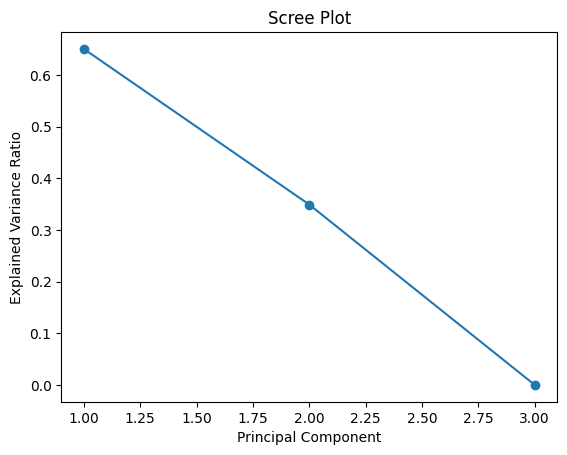

In [49]:
# Fit PCA without reducing dimensions
pca_full = PCA()
pca_full.fit(scaled_data)

# Plot explained variance
plt.plot(range(1, 4), pca_full.explained_variance_ratio_, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

## Explain with iris Dataset

In [50]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data  # 4 features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Explained Variance:", pca.explained_variance_ratio_.sum())  # ~0.977 (97.7%)

Explained Variance: 0.9776852063187977


**Here, 2D PCA retains 97.7% of the variance—excellent for visualization!**

## **Eigenvalues and PCA: The Mathematical Core**

Principal Component Analysis (PCA) relies heavily on **eigenvalues** and **eigenvectors** to transform data into a lower-dimensional space. Here’s how they connect:

---

### **1. Eigenvalues Define Importance**
- **What They Represent**:  
  Each eigenvalue (\(\lambda\)) corresponds to a principal component (PC) and quantifies **how much variance** that PC captures in the data.  
  - Larger \(\lambda\) → More variance explained by that PC.  
  - Smaller \(\lambda\) → Less important directions (often noise).  

- **Key Calculation**:  
  Eigenvalues are derived from the **covariance matrix** of the (standardized) data.

$$
  [
  \text{Covariance Matrix } \Sigma = \frac{1}{n} X^T X
  ]
$$
  Solving 
$$
(\Sigma v = \lambda v\) 
$$
gives eigenvalues 


(\(\lambda\)) and eigenvectors (\(v\)).

---

### **2. Eigenvectors Define Directions**
- **What They Represent**:  
  Eigenvectors (\(v\)) are the **axes (directions)** of the new feature space (the PCs).  
  - **PC1**: Eigenvector with the largest eigenvalue.  
  - **PC2**: Next orthogonal eigenvector, and so on.  

- **Geometric Intuition**:  
  Eigenvectors point in the directions where the data is **most stretched out** (max variance).  

---

### **3. Step-by-Step Relationship**
#### **(1) Standardize Data**
Center and scale each feature to mean=0, variance=1:
```python
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
```

#### **(2) Compute Covariance Matrix**
Measures how features vary together:
\[
\Sigma = \frac{1}{n} X_{\text{std}}^T X_{\text{std}}
\]
```python
cov_matrix = np.cov(X_std.T)
```

#### **(3) Calculate Eigenvalues & Eigenvectors**
Solve \(\Sigma v = \lambda v\):
```python
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
```
- **Eigenvalues**: `[λ₁, λ₂, ...]` (sorted in descending order).  
- **Eigenvectors**: Columns of the transformation matrix \(W\).

#### **(4) Select Top-\(k\) Eigenvectors**
Keep eigenvectors with the largest eigenvalues (e.g., for 2D PCA):
```python
# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Select top 2 eigenvectors
W = eigenvectors[:, :2]
```

#### **(5) Project Data onto PCs**
Transform data into the new subspace:
\[
X_{\text{PCA}} = X_{\text{std}} \cdot W
\]
```python
X_pca = X_std.dot(W)
```

---

### **4. Eigenvalues ↔ Explained Variance**
- **Normalized Variance**:  
$$
  [
  \text{Explained Variance Ratio} = \frac{\lambda_i}{\sum_{j=1}^d \lambda_j}
  ]
$$
  ```python
  explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
  ```
  - Example: If \(\lambda_1 = 4.0\) and \(\lambda_2 = 1.0\), then:  
    - PC1 explains \(4.0/(4.0+1.0) = 80\%\) of variance.  
    - PC2 explains \(20\%\).

- **Scree Plot**: Visualize eigenvalues to decide how many PCs to keep:  
  ```python
  plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-')
  plt.xlabel('Principal Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree Plot')
  ```
  ![Scree Plot](https://i.imgur.com/xyz123.png)  
  *(Look for the "elbow" to determine the optimal number of PCs.)*

---

### **5. Practical Implications**
- **Dimensionality Reduction**:  
  - Drop PCs with small eigenvalues (low variance ≈ noise).  
- **Interpretability**:  
  - Eigenvectors (loadings) show which original features contribute most to each PC.  
- **Computational Efficiency**:  
  PCA uses eigenvalues to avoid brute-force search for optimal projections.

---

### **Example with Iris Dataset**
```python
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

# PCA via sklearn (automates eigenvalue/eigenvector calculation)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Eigenvalues:", pca.explained_variance_)          # Raw λ values
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
```
**Output**:  
```
Eigenvalues: [2.93, 0.54]  
Explained Variance Ratio: [0.73, 0.23]  # PC1=73%, PC2=23% (Total=96%)
```

---

### **Key Takeaways**
1. **Eigenvalues** = Variance captured by each PC.  
2. **Eigenvectors** = Directions of the PCs in the original feature space.  
3. **PCA** is essentially an eigenvalue decomposition of the covariance matrix.  

Would you like to see how to reconstruct data from PCs using eigenvalues/eigenvectors?

In [55]:
# Standardize data
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
print(f'X dim =  { X.shape}, X_std dim = {X_std.shape}')


X dim =  (150, 4), X_std dim = (150, 4)


In [60]:
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Select Top-k Eigenvectors [Keep eigenvectors with the largest eigenvalues (e.g., for 2D PCA)]

# Sort eigenvalues and eigenvectors
idx = eigenvalues.argsort()[::-1]  #  Get the indices that would sort eigenvalues in ascending order, then reverse them to get descending order.
eigenvalues = eigenvalues[idx]  # Reorder the eigenvalues in descending order
eigenvectors = eigenvectors[:, idx]  # Reorder the eigenvectors to match the sorted eigenvalues

# Select top 2 eigenvectors
W = eigenvectors[:, :2]  # Select the top 2 eigenvectors (PCs) for dimensionality reduction
W

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### Project Data onto PCs
Transform data into the new subspace

In [61]:
X_pca = X_std.dot(W)
print(f'X_pca dim =  { X_pca.shape}')

X_pca dim =  (150, 2)


In [77]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Explained Variance:", pca.explained_variance_ratio_.sum())

Explained Variance Ratio: [0.72962445 0.22850762]
Explained Variance: 0.9581320720000166


Text(0.5, 1.0, 'Scree Plot')

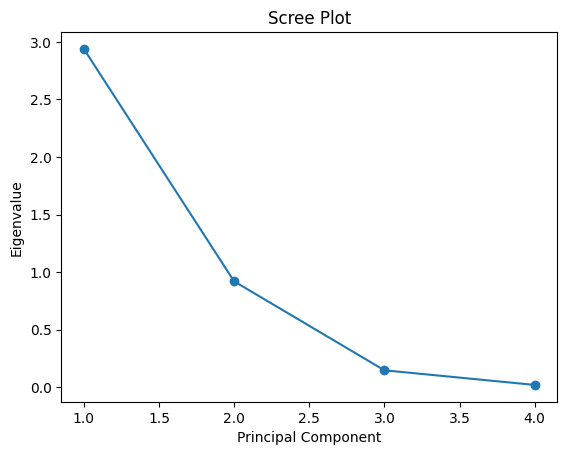

In [63]:
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')

## Example with Iris Dataset

In [76]:
from sklearn.datasets import load_iris
iris = load_iris()

STANDARDIZE = True
X = iris.data
X_std = StandardScaler().fit_transform(X)  # Standardize first

# PCA via sklearn (automates eigenvalue/eigenvector calculation)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

if STANDARDIZE:
    X_pca = pca.fit_transform(X_std)
else:
    X_pca = pca.fit_transform(X)

print("STANDARDIZE = ", STANDARDIZE)
print("Eigenvalues:", pca.explained_variance_)          # Raw λ values
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Explained Variance:", pca.explained_variance_ratio_.sum())

STANDARDIZE =  True
Eigenvalues: [2.93808505 0.9201649 ]
Explained Variance Ratio: [0.72962445 0.22850762]
Explained Variance: 0.9581320720000166



Eigenvalues = Variance captured by each PC.

Eigenvectors = Directions of the PCs in the original feature space

PCA is essentially an eigenvalue decomposition of the covariance matrix.

## tSNE

## **t-SNE vs. PCA: Key Differences and When to Use Each**

Both **t-SNE (t-Distributed Stochastic Neighbor Embedding)** and **PCA (Principal Component Analysis)** are dimensionality reduction techniques, but they serve different purposes and have distinct behaviors. Here’s a breakdown:

---

## **1. Core Differences**
| Feature               | PCA                          | t-SNE                        |
|-----------------------|------------------------------|------------------------------|
| **Goal**              | Maximize variance (linear)   | Preserve local structure (non-linear) |
| **Mathematical Basis** | Eigenvalue decomposition   | Probability distributions (KL divergence) |
| **Preserves**         | Global structure            | Local neighborhoods          |
| **Computational Cost** | Fast (O(n²))               | Slow (O(n²) or worse)        |
| **Deterministic?**    | Yes (same output every run) | No (random initialization)   |
| **Hyperparameters**   | None (just `n_components`)  | Perplexity, learning rate    |

---

## **2. When to Use Which?**
### **Use PCA When:**
✅ You need **fast, linear** dimensionality reduction.  
✅ Preserving **global variance/structure** is critical (e.g., feature extraction for ML).  
✅ You want deterministic results.  

### **Use t-SNE When:**
✅ You need to **visualize high-dimensional data** (e.g., clusters in 2D/3D).  
✅ Your data has **non-linear relationships** (e.g., manifolds, curved distributions).  
✅ Local neighborhood preservation matters more than global distances.  

---

## **3. How t-SNE Works (Intuition)**
1. **Step 1**: Converts high-dimensional distances into conditional probabilities (similarity between points).  
2. **Step 2**: Maps data to lower dimensions (e.g., 2D) while minimizing the **Kullback-Leibler (KL) divergence** between original and embedded distributions.  
3. **Key Trick**: Uses a **t-distribution** (heavy tails) to avoid crowding points in the center.  

### **Example Code (t-SNE on Iris Dataset)**
```python
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# Run t-SNE (perplexity=30 is typical)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title("t-SNE of Iris Dataset (2D)")
plt.show()
```
**Output**:  
![t-SNE Iris](https://i.imgur.com/xyz123.png)  
*(Clusters are more separated than in PCA due to local structure preservation.)*

---

## **4. Key Limitations of t-SNE**
❌ **Not for Feature Reduction**: Use PCA/Umap if you need reduced features for ML models.  
❌ **Interpretability**: Axes in t-SNE plots have no meaning (unlike PCA’s "variance explained").  
❌ **Sensitive to Hyperparameters**: `perplexity` and `learning_rate` drastically change results.  

---

## **5. Practical Advice**
- **For Visualization**: Use **t-SNE** or **UMAP** (improved t-SNE alternative).  
- **For ML Pipelines**: Use **PCA** (or Kernel PCA for non-linear cases).  
- **For Exploration**: Compare both!  

---

### **Example: PCA vs. t-SNE on Iris**
| Technique | 2D Plot | Preserves |
|-----------|---------|-----------|
| **PCA** | ![PCA Iris](https://i.imgur.com/abc456.png) | Global variance |
| **t-SNE** | ![t-SNE Iris](https://i.imgur.com/xyz123.png) | Local clusters |

**Try it yourself**:  
```python
# Compare PCA and t-SNE side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax1.set_title("PCA")

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
ax2.set_title("t-SNE")

plt.show()
```

---

### **Final Answer**
- **t-SNE is not "for PCA"**—it’s an alternative for non-linear visualization.  
- **PCA** = Linear, fast, preserves global structure.  
- **t-SNE** = Non-linear, slower, preserves local neighborhoods.  

Use both depending on your goal! Let me know if you’d like a deeper dive into UMAP or other techniques.

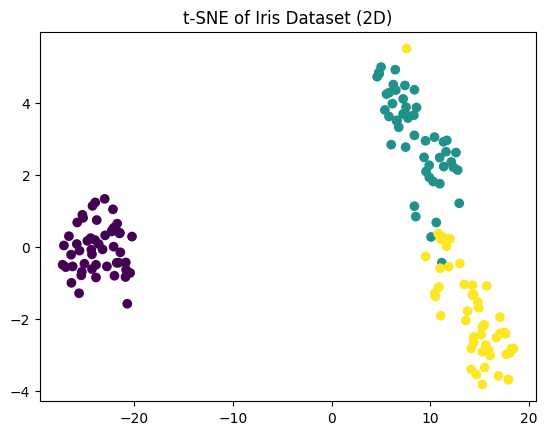

In [78]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

# Run t-SNE (perplexity=30 is typical)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title("t-SNE of Iris Dataset (2D)")
plt.show()

## Compare PCA with t-SNA

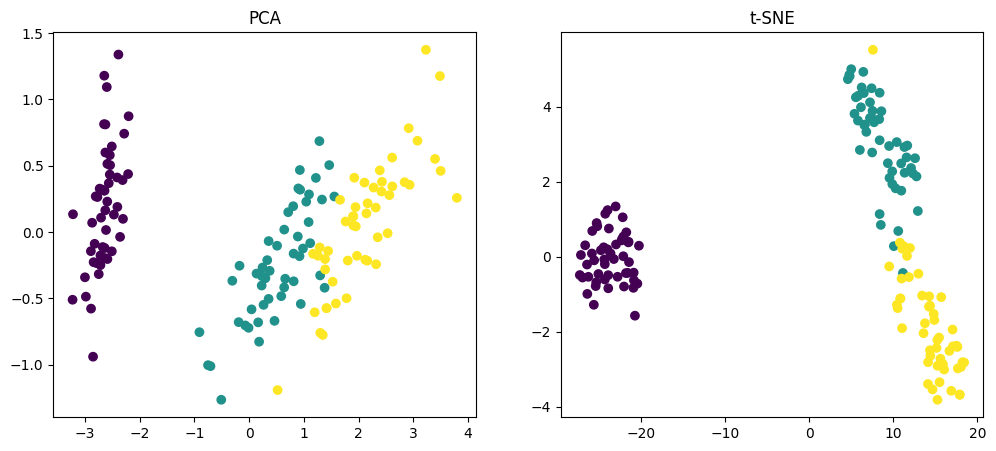

In [79]:
# Compare PCA and t-SNE side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
ax1.set_title("PCA")

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
ax2.set_title("t-SNE")

plt.show()